# Basics of Scikit-learn for Machine Learning  - Part 2
## Content : Evaluation Metrics
1. Imbalanced Class and Dummy Classifier.
2. binary Classification and Confusion Matrix.
        a. R2 Score (Accuracy)
        b. Precision.
        c. Recall.
        d. F1 Score.
3. Classification report.
4. Decision Function.
5. Prediction Probability.
6. Precision Recall Curve.
7. Area Under (RAC) Curve (AUC)
8. Learning Curve.
9. Sensitivity Analysis.

### Evaluation Method Selection
1. Method that matches the goal of the application.
2. Selected evaluation metrics should be computed for different models.
3. then select the best value evaluation metric

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


**Which class has how many data instances?**

In [2]:
digit = load_digits()
#print(digit)
X, y = digit['data'],digit['target']

for class_name, class_count in zip(digit['target_names'], np.bincount(digit['target'])):
    print('Digit = {}, Class Count = {}'.format(class_name, class_count))

Digit = 0, Class Count = 178
Digit = 1, Class Count = 182
Digit = 2, Class Count = 177
Digit = 3, Class Count = 183
Digit = 4, Class Count = 181
Digit = 5, Class Count = 182
Digit = 6, Class Count = 181
Digit = 7, Class Count = 179
Digit = 8, Class Count = 174
Digit = 9, Class Count = 180


### Imbalanced Class:
If any dataset, one class data is much more than the other class, it becomes an imblanaced class.For ecample, if a dataset have n=1000 data, and **999** of them are in negative class and **1** in positive class, this becomes an imbalaned class. This must be dealt carefully. For this *dummy classifier* is used.

**Creating a Imbalanced Dataset**

In [3]:
y_imbalanced = y.copy()
y_imbalanced[y_imbalanced != 1] = 0

print('Original dataset : \t{}\nImbalanced Dataset : \t{}\n\n'.format(y[0:20],y_imbalanced[0:20]))
print('Original dataset Class Count:\t',np.bincount(y))
print('Imbalaned dataset Class Count:\t',np.bincount(y_imbalanced))

Original dataset : 	[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Imbalanced Dataset : 	[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


Original dataset Class Count:	 [178 182 177 183 181 182 181 179 174 180]
Imbalaned dataset Class Count:	 [1615  182]


In [4]:
#Training a model

X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced,random_state = 0)

from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', C=1).fit(X_train, y_train)
print('Digits Dataset , SVM(rbf kernel):\nTrain Accuracy : {:.4f}, Test Accuracy : {:.4f}'
     .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Digits Dataset , SVM(rbf kernel):
Train Accuracy : 0.9993, Test Accuracy : 0.9956


### Dummy Classifier: 
The classifier that doesn't look through the input data , and blindly predicts only the most frequent data. This serves as a sanity check.They provide a null metric baseline and shouldn't be used for real problems.

If the developed models accuracy is close to dummy classifer, this means:
1. Ineffective, erroneous or missing features
2. Poor choice of kernel or hyperparameter
3. Large class imbalance

### Strategy parameter:

1. **dummy classifier strategy parameter**:
    1. most_frequent : predicts only the most frequent (majority) class.
    2. stratified : predicts randomly based on training class.
    3. uniform : uniformly predicts at random. 
    4. constant : predict using a constant provided by the user.

2. **dummy regressor strategy parameter**:
    1. mean : predicts the mean of the training targets.
    2. median : predicts the median of the training targets.
    3. quantile : predicts a user-provided quantile of the training targets.
    4. constant : predicts a constant user-provided value


In [5]:
#dummy model
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_pred = dumb.predict(X_test)
y_pred;
print('Dummy Classifier Accuracy :\t', dumb.score(X_test, y_test))
#new model
svm = SVC(kernel = 'rbf', C=1).fit(X_train, y_train)
print ('SVM (Linear Kernel) Accuracy :\t', svm.score(X_test,y_test))

Dummy Classifier Accuracy :	 0.9044444444444445
SVM (Linear Kernel) Accuracy :	 0.9955555555555555


### Binary Classification:

TP = True Positive, TN = True Negative, TN = True Negative , FN = False Negative

                  Predicted Negative    Precited Positive
                  -------------------   ------------------
    True Negative|        TN                   FP
    True Positive|        FN                   TP
   *this can also be called Confusion Matrix*
### Confusion Matrix:

In [6]:
#dummy classifier 1
from sklearn.metrics import confusion_matrix
dummy1 = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
confusion1 = confusion_matrix(y_test, dummy1.predict(X_test))
print('1.Dummy Classifier(strategy = Most frequent):\n',confusion1)

#dummy classifier 2
dummy2 = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
confusion2 = confusion_matrix(y_test, dummy2.predict(X_test))
print('2.Dummy Classifier(strategy = Stratified):\n',confusion2)

# SVC classifer 1
svc1 = SVC(kernel = 'rbf', C=1).fit(X_train, y_train)
confusion3 = confusion_matrix(y_test, svc1.predict(X_test))
print('3.SVM Classifier(kernel = rbf):\n',confusion3)

# SVC classifer 2
svc2 = SVC(kernel = 'linear', C=1).fit(X_train, y_train)
confusion4 = confusion_matrix(y_test, svc2.predict(X_test))
print('4.SVM Classifier(kernel = linear):\n',confusion4)

#logistic regression classifer
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 100).fit(X_train, y_train)
confusion5 = confusion_matrix(y_test, logreg.predict(X_test))
print('5.Logistic Regression Classifier(default):\n',confusion5)

#Decision tree classifer
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
confusion6 = confusion_matrix(y_test, dt.predict(X_test))
print('6.Decision Tree Classifier(max depth = 2):\n',confusion5)


1.Dummy Classifier(strategy = Most frequent):
 [[407   0]
 [ 43   0]]
2.Dummy Classifier(strategy = Stratified):
 [[362  45]
 [ 38   5]]
3.SVM Classifier(kernel = rbf):
 [[407   0]
 [  2  41]]
4.SVM Classifier(kernel = linear):
 [[402   5]
 [  5  38]]
5.Logistic Regression Classifier(default):
 [[401   6]
 [  8  35]]
6.Decision Tree Classifier(max depth = 2):
 [[401   6]
 [  8  35]]


C:\Users\dewan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation Metrics:
1. Accuracy = (TN+FN) /(TN+FN+FP+TP)
2. Precision, P = TP / (TP+FP)
3. Recall or True Positive rate, R = TP / (TP+FN)
4. False Positive rate = FP / (TN+FP)
5. F1 score = (2 * P * R)/(P+R)

**Evaluation Metrics on Decision Tree Classifier:**

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
print('Accuracy Score : \t', accuracy_score(y_test, dt.predict(X_test)))
print('Precision Score : \t', precision_score(y_test, dt.predict(X_test)))
print('Recall Score : \t\t', recall_score(y_test, dt.predict(X_test)))
print('F1 Score : \t\t', f1_score(y_test, dt.predict(X_test)))

Accuracy Score : 	 0.9466666666666667
Precision Score : 	 0.7878787878787878
Recall Score : 		 0.6046511627906976
F1 Score : 		 0.6842105263157895


#### Classification Report:

In [8]:
from sklearn.metrics import classification_report
print('Decision Tree\n================================================>\n',
     (classification_report(y_test, dt.predict(X_test), target_names = ['not 1', '1'])))
print('Logistic Regressio\n================================================>\n',
     (classification_report(y_test, logreg.predict(X_test), target_names = ['not 1', '1'])))
print('Dummy1 (most frequent)\n================================================>\n',
     (classification_report(y_test, dummy1.predict(X_test), target_names = ['not 1', '1'])))
print('SVC (rbf kernel)\n================================================>\n',
     (classification_report(y_test, svc1.predict(X_test), target_names = ['not 1', '1'])))

Decision Tree
================================================>
               precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450

Logistic Regressio
================================================>
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.97      0.97      0.97       450

Dummy1 (most frequent)
================================================>
               precision    recall  f1-score   support

       not 1       0.90      1.00      0.95       407
           1       0.00     

C:\Users\dewan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Function:

1. Each classifier score value per test point indicates how confidently the classifier predicts the positive class (large magnitude positive values) or the negative class (large-magnitude negative values).
2. Choosing a fixed decision threshold gives a classification rule.
3. By sweeping the decision threshold through the entire range of possible score values, we get a series of classification outcomes that form a curve.

**Show the decision_function scores for first 20 instances**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced, random_state = 0)
logreg = LogisticRegression().fit(X_train, y_train)
decision = logreg.decision_function(X_test)

ytest_decision_zip = (list(zip(y_test, decision)))
ytest_decision_zip[:20]

C:\Users\dewan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828774313905022),
 (0, -19.382818344248953),
 (0, -29.19860027600813),
 (0, -21.746357742553663),
 (0, -22.642362598655893),
 (0, -11.805877250643062),
 (1, 6.4960016223442825),
 (0, -23.354653349748332),
 (0, -27.54406544566801),
 (0, -26.88820726569343),
 (0, -31.863150064862083),
 (0, -22.486048613042186),
 (0, -25.31804779221163),
 (0, -13.384488795881898),
 (0, -13.565666438374436),
 (0, -13.30831745550338),
 (1, 12.181042886613222),
 (0, -34.36238913581851),
 (0, -13.231570517119035),
 (0, -29.594014708843964)]

### Predicted Probability of Class Membership (predict_proba)

1. Typical rule: choose most likely class
        – e.g class 1 if threshold > 0.50.
2. Adjusting threshold affects predictions of classifier.
3. Higher threshold results in a more conservative classifier
        – e.g. only predict Class 1 if estimated probability of class 1 is above 70% 
4. This increases precision. Doesn't predict class 1 as often, but when it does, it gets high proportion of class 1 instances correct.
5. Not all models provide realistic probability estimates

**Show the probability of positive class for first 20 instances.**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced, random_state = 0)
logreg = LogisticRegression().fit(X_train, y_train)
prediction_probabilty = logreg.predict_proba(X_test)
class_predprob_list = list(zip(y_test,prediction_probabilty[:,1]))
class_predprob_list[:20]

C:\Users\dewan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.1105239100610098e-13),
 (0, 3.820752867286338e-09),
 (0, 2.0854943655275762e-13),
 (0, 3.5948173637355963e-10),
 (0, 1.467394429525488e-10),
 (0, 7.460525445343923e-06),
 (1, 0.998492812498635),
 (0, 7.197852179483891e-11),
 (0, 1.0908483216233542e-12),
 (0, 2.101841468468369e-12),
 (0, 1.4521442207485444e-14),
 (0, 1.7156676698587724e-10),
 (0, 1.0104423757092578e-11),
 (0, 1.5388266697255996e-06),
 (0, 1.2838236296731673e-06),
 (0, 1.6606206895327156e-06),
 (1, 0.999994873298117),
 (0, 1.192899930557011e-15),
 (0, 1.7930861613402569e-06),
 (0, 1.404373786790499e-13)]

### Precision Recall Curve

C:\Users\dewan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


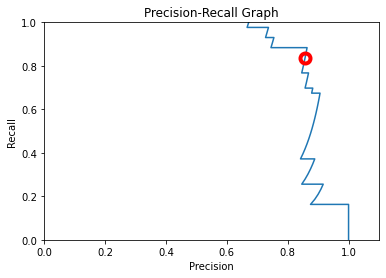

In [11]:
from sklearn.metrics import precision_recall_curve
logreg = LogisticRegression().fit(X_train, y_train)
probab_pred = logreg.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test, probab_pred)

## first get the least magnitude value from the threshold's absolute values.This gets the decision threshold zero value.
## this will give a index to search for in precision and recall array.
## This is the achived precision-recall for decision threshold zero

closest_zero = abs(threshold).argmin()
closest_zero_precision = precision[closest_zero]
closest_zero_recall = recall[closest_zero]

plt.figure()
plt.plot(precision, recall)
plt.plot(closest_zero_precision, closest_zero_recall, marker = 'o',
         fillstyle = 'none', markersize = 10, color = 'red', mew = 4)
plt.title('Precision-Recall Graph')
plt.xlim(0,1.1)
plt.ylim(0,1)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()


**Findings**
1. This shows a generel trade-off between precision and recall i.e if precision goes up, recall goes down.
2. This also shows a general downward trend as the decision function increases from the threshold zero value. 
3. In the graph, there are many zagged curves. This happens because of how they are calculated via formulas. As we know, precision and recall uses decrete values of true positives, any small change in decision threshold gives a much drastic result in the curve.

## ROC Curve and Area Under Curve (AUC)

**ROC Curve**:
This curve shows the relation between True Positive Rate (TPR) and False Positive Rate (FPR).We know, The higher the TPR , the better the precision and recall score. The top left corner is the **Ideal** point , which has TPR=1, FPR=0. Steepness of the curve is important, as our goal is to maximize the TPR while minimizing the FPR.


**AUC**:
AUC = 0 (worst) AUC = 1 (best)
1. AUC can be interpreted as:
        1. The total area under the ROC curve.
        2. The probability that the classifier will assign a higher score to a randomly chosen positive example than to a randomly chosen negative example.
2. Advantages:
        1. Gives a single number for easy comparison.
        2. Does not require specifying a decision threshold.
3. Drawbacks:
        1. As with other single-number metrics, AUC loses information, e.g. about tradeoffs and the shape of the ROC curve.
        2. This may be a factor to consider when e.g. wanting to compare the performance of classifiers with overlapping   ROC curves.

**Example : Plot ROC Curve for Logistic Regression**

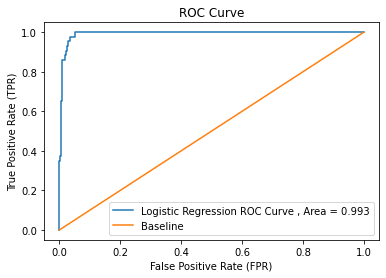

In [12]:
from sklearn.metrics import roc_curve, auc
X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced, random_state = 0)
logreg = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
decision_score = logreg.decision_function(X_test)
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, decision_score)
auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label= 'Logistic Regression ROC Curve , Area = {:.3f}'.format(auc_logreg))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.plot([0,1], [0,1], label = 'Baseline', linestyle = 'solid')
plt.legend()
plt.show()

**Example : Plot ROC Curve for SVM for different gamma values.**

In [13]:
from matplotlib import cm
%matplotlib notebook
X_train, X_tes, y_train, y_test = train_test_split(X, y_imbalanced, random_state = 0)
plt.figure(figsize = (10,7));
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

for g in np.logspace(-3, 2, 6):
    clf = SVC(gamma = g).fit(X_train, y_train)
    decision_score = clf.decision_function(X_test)
    fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, decision_score)
    auc_svm = auc(fpr_svm, tpr_svm)
    acc_svm = clf.score(X_test, y_test)
    plt.plot(fpr_svm, tpr_svm, label = 'Gamma = {}, Area = {:.3f}, Accuracy = {:.3f}'.format(g, auc_svm, acc_svm),
            linestyle = '--',alpha = 0.6)

plt.plot([0,1], [0,1], label = 'baseline', mew = 3, color = '#f5e3df', linestyle = ':')
plt.legend(loc = (.4,0.06))


plt.show()

<IPython.core.display.Javascript object>

From the Graph, we can see that , all the Gamma Values below 1.0 has the least auc score & accuracy. Which means these gamma values don't maximize TPR & minimize FPR.

### Evaluation measures for multi-class classification


In [14]:
digits = load_digits()
X_mc, y_mc = digits.data, digits.target
X_mc_train, X_mc_test, y_mc_train, y_mc_test = train_test_split(X_mc, y_mc)

clf_mc = SVC(kernel = 'linear')
clf_mc.fit(X_mc_train, y_mc_train)
predict_mc = clf_mc.predict(X_mc_test)
confusion_mc = confusion_matrix(y_mc_test, predict_mc)
plt.figure()
sns.heatmap(confusion_mc, annot = True)

plt.title('SVM Linear Kernel\nAccuracy = {:.3f}'.format(clf_mc.score(X_mc_test, y_mc_test)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('Classification Report (kernel = linear):\n\n',classification_report(y_mc_test, predict_mc))

<IPython.core.display.Javascript object>

Classification Report (kernel = linear):

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.93      1.00      0.96        39
           2       0.98      1.00      0.99        42
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        39
           5       0.98      1.00      0.99        42
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        44
           8       1.00      0.90      0.95        51
           9       1.00      1.00      1.00        51

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



**Example 1** :
Build a SVC model with rbf kernel using digits classifier, train then find the confusion matrix and then Plot a heatmap of it.
Also , show the classification report.

In [15]:
clf_rbf = SVC(kernel = 'linear')
clf_rbf.fit(X_train_mc, y_train_mc)
predict_rbf = clf_rbf.predict(X_test_mc)
confusion_rbf = confusion_matrix(y_test_mc, predict_rbf)
plt.figure()
sns.heatmap(confusion_rbf, annot = True)
plt.title('SVM Linear Kernel\nAccuracy = {:.3f}'.format(clf_mc.score(X_mc_test, y_mc_test)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('Classification Report (kernel = rbf):\n\n',classification_report(y_mc_test, predict_rbf))


NameError: name 'X_train_mc' is not defined

#### Micro- vs. Macro-averaged metrics
1. Macro-average: 
    1. Each class has equal weight.
    2. Compute metric within each class
    3. Average resulting metrics across classes
2. Micro-average: 
    1. Each instance has equal weight.
    2. Largest classes have most influence
    3. Aggregrate outcomes across all classes
    4. Compute metric with aggregate outcomes
    
#### Macro-Average vs Micro-Average
1. If the classes have about the same number of instances, macro- and micro-average will be about the same.
2. If some classes are much larger (more instances) than others, and you want to:
    1. Weight your metric toward the largest ones, use micro-averaging.
    2. Weight your metric toward the smallest ones, use macro-averaging.
3. If the micro-average is much lower than the macro-average then examine the larger classes for poor metric performance.
4. If the macro-average is much lower than the micro-average then examine the smaller classes for poor metric performance.

#### Multi-class Evaluation Metrics via the "Average" 
Parameter for a Scoring Function : 
1. Micro: Metric on aggregated instances
2. Macro: Mean per-class metric, classes have equal weight
3. Weighted: Mean per-class metric, weighted by support
4. Samples: for multi-label problems only

#### Example: Show the difference between micro and macro avarage metrics for precision_score and f1_score

In [ ]:
print('Micro Precision Score = {:.3f} (treat instances equally)'.format(precision_score(y_test_mc, predict_rbf, average = 'micro')))
print('Macro Precision Score = {:.3f} (treat classes equally)'.format(precision_score(y_test_mc, predict_rbf, average = 'macro')))

In [ ]:
print('Micro Precision Score = {:.3f} (treat instances equally)'.format(f1_score(y_test_mc, predict_rbf, average = 'micro')))
print('Macro Precision Score = {:.3f} (treat classes equally)'.format(f1_score(y_test_mc, predict_rbf, average = 'macro')))

### Regression evaluation metrics

To evaluate a fitted model, we can compare it against a Dummy Predicition Model. Comparison to a 'dummy'prediction model that uses a fixed rule can be useful. The DummyRegressor class implements four simple baseline rules for regression, using the **strategy** parameter:
1. **mean** predicts the mean of the training target values.
2. **median** predicts the median of the training target values.
3. **quantile** predicts a user-provided quantile of the training target values (e.g. value at the 75th percentile)
4. **constant** predicts a custom constant value provided by the user.


**Example** : Using Diabetes Dataset, fit a linear regression model and compare it against a dummy model to show how good/bad it is.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error

R2-Score for Linear Model : 0.064
Mean Squared Error for Linear Model : 4646.740
R2-Score for Dummy Model : -0.038
Mean Squared Error for Dummy Model : 5153.910


<IPython.core.display.Javascript object>


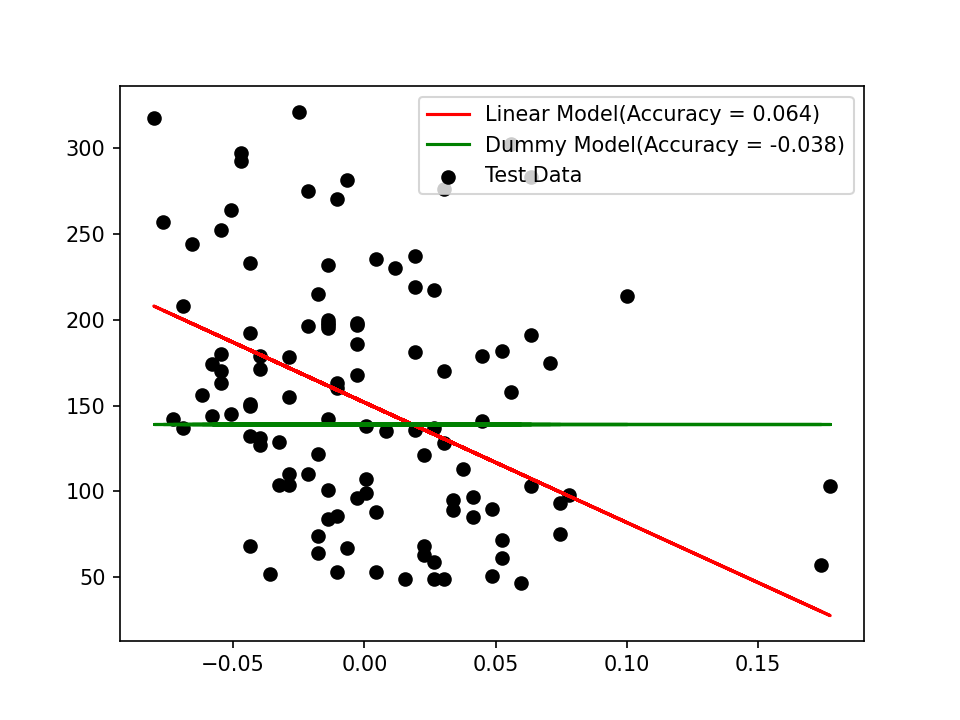

In [59]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:, None ,6]
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Linear Model
linreg = LinearRegression().fit(X_train, y_train)
predict = linreg.predict(X_test)
print('R2-Score for Linear Model : {:.3f}'.format(r2_score(y_test, predict)))
print('Mean Squared Error for Linear Model : {:.3f}'.format(mean_squared_error(y_test, predict)))

# Dummy Model
linreg_dummy = DummyRegressor(strategy = 'median').fit(X_train, y_train)
predict_dummy = linreg_dummy.predict(X_test)
print('R2-Score for Dummy Model : {:.3f}'.format(r2_score(y_test, predict_dummy)))
print('Mean Squared Error for Dummy Model : {:.3f}'.format(mean_squared_error(y_test, predict_dummy)))

# Plotting these two
plt.figure()
plt.scatter(X_test, y_test, color = 'black', label = 'Test Data')
plt.plot(X_test, predict, color = 'Red', label = 'Linear Model(Accuracy = {:.3f})'
         .format(linreg.score(X_test, y_test)))
plt.plot(X_test, predict_dummy, color = 'Green', label = 'Dummy Model(Accuracy = {:.3f})'
         .format(linreg_dummy.score(X_test, y_test)))
plt.legend(loc = 0)
plt.show()

## Model Selection Using Evaluation Metrics
1. **Train/test on same data:**
    1. Single metric.
    2. Typically overfits and likely won't generalize well to new data.
    3. But can serve as a sanity check: low accuracy on the training set may indicate an implementation problem.
2. **Single train/test split :**
    1. Single metric.
    2. Speed and simplicity.
    3. Lack of variance information
3. **K-fold cross-validation :**
    1. K train-test splits.
    2. Average metric over all splits.
    3. Can be combined with parameter grid search: GridSearchCV (def. cv = 3)
    
    
### Cross-Validation

In [85]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
digit = load_digits()

X, y = digit.data, digit.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'linear', C=1)

print('Cross-validation (accuracy) :\t', cross_val_score(clf, X, y, cv = 5))
print('Cross-validation (AUC) :\t', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
print('Cross-Validation (recall) :\t', cross_val_score(clf, X, y, cv= 5, scoring = 'recall'))

Cross-validation (accuracy) :	 [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) :	 [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-Validation (recall) :	 [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


### Grid Search
For maximum **Accuracy** and **AUC**, Find the best Gamma value on **svc(rbf)** using **GridSearchCV** (Gamma Values = [0.001, 0.01, 0.05, 0.1, 1, 10, 100] )

In [108]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.svm import SVC
digit = load_digits()

X, y = digit.data, digit.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'rbf')
gamma_vals = {'gamma' : [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

#Prioritizing Accuracy as metrics
clf_grid_acc = GridSearchCV(clf, param_grid = gamma_vals).fit(X_train, y_train)
bestparam_acc = clf_grid_acc.best_params_
bestscore_acc = clf_grid_acc.best_score_
print('For best param {}, Best Score = {:.3f} (prioritizing Accuracy)'
     .format(bestparam_acc, bestscore_acc))

#Prioritizing AUC as metrics
clf_grid_auc = GridSearchCV(clf,param_grid = gamma_vals, scoring = 'roc_auc').fit(X_train, y_train)
bestparam_auc = clf_grid_auc.best_params_
bestscore_auc = clf_grid_auc.best_score_
print('For best param {}, Best Score = {:.3f} (prioritizing AUC)'
     .format(bestparam_auc, bestscore_auc))

For best param {'gamma': 0.001}, Best Score = 0.999 (prioritizing Accuracy)
For best param {'gamma': 0.001}, Best Score = 1.000 (prioritizing AUC)


## Evaluation metrics supported for model selection

In [65]:
from sklearn.metrics.scorer import SCORERS
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


# Conclusion:

1. Accuracy is often not the right evaluation metric for many Real World Machine Learning tasks
    1. False positives and false negatives may need to be treated very differently
    2. Make sure you understand the needs of your application and choose an evaluation metric that matches your application, user, or business goals.
2. Examples of additional evaluation methods include:
     1. **Learning curve**: How much does accuracy (or other metric) change as a function of the amount of training data?
     2. **Sensitivity analysis**: How much does accuracy (or other metric) change as a function of key learning parameter values?